In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from statsmodels.formula.api import ols


In [2]:
processed_df = pd.read_csv('../../data/processed/processeddata.csv')
merged_df = pd.read_csv('../../data/processed/mergedDF.csv', dtype=str)

In [3]:
processed_df.head()

,Major,Minor,SalePrice,SqFtLot_log,SqFtFstFloor_log,SqFtTotLiving_log,SqFtTotBasement_log,SalePrice_log,Area_log,Bedrooms_log,...,PcntUnusable,PlatType,PropertyType,StreetSurface,BldgGrade,NbrLivingUnits,SeismicHazard,TrafficNoise,PropertyClass,SaleReason
0,638580,110,190000,0.478043,-0.008028,-0.145665,0.411231,-1.449880,-0.309343,0.557558,...,0.0,,3,1,7,1,N,0,8,1
1,638580,110,338000,0.478043,-0.008028,-0.145665,0.411231,-0.767285,-0.309343,0.557558,...,0.0,,3,1,7,1,N,0,8,1
2,175070,50,812000,0.002005,0.707846,-0.241195,1.129447,0.271328,-0.756620,0.557558,...,0.0,,11,1,7,1,N,0,8,1
3,168940,110,1190900,-0.523350,-0.525560,-0.192973,-0.006437,0.725147,-1.073968,0.557558,...,0.0,,3,1,8,1,N,0,8,1
4,168940,110,1553000,-0.523350,-0.525560,-0.192973,-0.006437,1.039744,-1.073968,0.557558,...,0.0,,11,1,8,1,N,0,8,1


Seperated the preprocessed residential PropertyTypes from the rest.

In [31]:
df_pType_11 = merged_df[merged_df['PropertyType'] == '11']
df_pType_12 = merged_df[merged_df['PropertyType'] == '12']
df_pType_13 = merged_df[merged_df['PropertyType'] == '13']
df_pType_14 = merged_df[merged_df['PropertyType'] == '14']
df_pType_18 = merged_df[merged_df['PropertyType'] == '18']
res_dfs = [df_pType_11, df_pType_12, df_pType_13, df_pType_14, df_pType_18]
residential_merged = pd.concat(res_dfs)

In [30]:
df_cont = residential_merged[Continuous]
df_cat = residential_merged[Categoricals]
residential_preprocessed = pd.concat([df_cont, df_cat], axis= 1)
residential_preprocessed

,SalePrice,SqFtLot,SqFtFstFloor,SqFtTotLiving,SqFtTotBasement,Area,Bedrooms,YrBuilt,BathFullCount,BathHalfCount,PlatType,PropertyType,StreetSurface,BldgGrade,NbrLivingUnits,SeismicHazard,TrafficNoise,PropertyClass,SaleReason
2,812000,6100,1480,2050,1480,16,4,1947,2,1,,11,1,7,1,N,0,8,1
4,1553000,3338,860,2090,860,12,4,1926,2,1,,11,1,8,1,N,0,8,1
8,530000,927,450,1090,440,79,2,2016,1,1,,11,0,8,1,N,2,8,1
10,1085000,1130,480,1870,790,13,3,2008,2,1,,11,1,8,1,N,0,8,1
11,625000,10530,1590,3920,1650,93,5,2020,2,1,,11,1,10,1,N,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23243,695000,1600,655,1675,580,15,3,2007,2,1,,18,1,8,1,N,1,8,1
26401,460000,1729,680,1380,650,77,3,1998,2,1,,18,1,7,1,N,0,8,1
29569,750000,1330,540,1410,360,19,2,2012,1,1,,18,1,8,1,N,0,8,1
30124,880000,2499,550,1310,500,19,2,2004,2,1,,18,1,8,1,N,0,8,1


In [85]:
residential_preprocessed.to_csv('../../data/processed/residential_preprocessed.csv', index=False)
residential_processed.to_csv('../../data/processed/residential_processed.csv', index=False)

In [41]:
these_columns = residential_preprocessed.columns.to_list()
these_columns.remove('PlatType')
these_columns.remove('SeismicHazard')
for vari in these_columns:
    residential_preprocessed[vari] = residential_preprocessed[vari].astype(int)

Seperated the processed residential PropertyTypes from the rest.

In [25]:
residential_pTypes = [11, 12, 13, 14, 18]
df_pType_11 = processed_df[processed_df['PropertyType'] == 11]
df_pType_12 = processed_df[processed_df['PropertyType'] == 12]
df_pType_13 = processed_df[processed_df['PropertyType'] == 13]
df_pType_14 = processed_df[processed_df['PropertyType'] == 14]
df_pType_18 = processed_df[processed_df['PropertyType'] == 18]
res_dfs = [df_pType_11, df_pType_12, df_pType_13, df_pType_14, df_pType_18]
residential_processed = pd.concat(res_dfs)
residential_processed

,Major,Minor,SalePrice,SqFtLot_log,SqFtFstFloor_log,SqFtTotLiving_log,SqFtTotBasement_log,SalePrice_log,Area_log,Bedrooms_log,...,PcntUnusable,PlatType,PropertyType,StreetSurface,BldgGrade,NbrLivingUnits,SeismicHazard,TrafficNoise,PropertyClass,SaleReason
2,175070,50,812000,0.002005,0.707846,-0.241195,1.129447,0.271328,-0.756620,0.557558,...,0.0,,11,1,7,1,N,0,8,1
4,168940,110,1553000,-0.523350,-0.525560,-0.192973,-0.006437,1.039744,-1.073968,0.557558,...,0.0,,11,1,8,1,N,0,8,1
8,162404,9140,530000,-1.639708,-1.997120,-1.817444,-1.408667,-0.234228,1.004910,-2.014194,...,0.0,,11,0,8,1,N,2,8,1
10,202504,9183,1085000,-1.467162,-1.850486,-0.470525,-0.184080,0.614787,-0.985671,-0.509816,...,0.0,,11,1,8,1,N,0,8,1
11,663990,350,625000,0.477712,0.870732,1.376453,1.356959,-0.038848,1.184886,1.385477,...,0.0,,11,1,10,1,N,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23243,125020,554,695000,-1.164117,-1.144228,-0.745332,-0.830638,0.086953,-0.827814,-0.509816,...,0.0,,18,1,8,1,N,1,8,1
26401,88000,40,460000,-1.096553,-1.059123,-1.228765,-0.592222,-0.402086,0.976623,-0.509816,...,0.0,,18,1,7,1,N,0,8,1
29569,276760,3580,750000,-1.325165,-1.582880,-1.175098,-1.828548,0.177206,-0.567048,-2.014194,...,0.0,,18,1,8,1,N,0,8,1
30124,276760,1667,880000,-0.775591,-1.541190,-1.358666,-1.141190,0.366629,-0.567048,-2.014194,...,0.0,,18,1,8,1,N,0,8,1


In [29]:
Categoricals = ['PlatType', 'PropertyType', 'StreetSurface', 
                'BldgGrade', 'NbrLivingUnits','SeismicHazard', 
                'TrafficNoise', 'PropertyClass', 'SaleReason']
Continuous = ['SalePrice', 'SqFtLot', 'SqFtFstFloor', 'SqFtTotLiving', 
              'SqFtTotBasement', 'Area', 'Bedrooms', 
              'YrBuilt', 'BathFullCount', 'BathHalfCount']
Percents = ['PcntComplete', 'PcntUnusable']

In [18]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()
def min_max(feature):
    return (feature - min(feature))/(max(feature)-min(feature))

for vari in Continuous:
    merged_df[vari].fillna(0, inplace=True)
    merged_df[vari] = merged_df[vari].astype(int)
    
    
for vari in Percents:
    merged_df[vari].fillna(0, inplace=True)
    merged_df[vari] = merged_df[vari].astype(float)

Correlation maps used to decide which features to use.

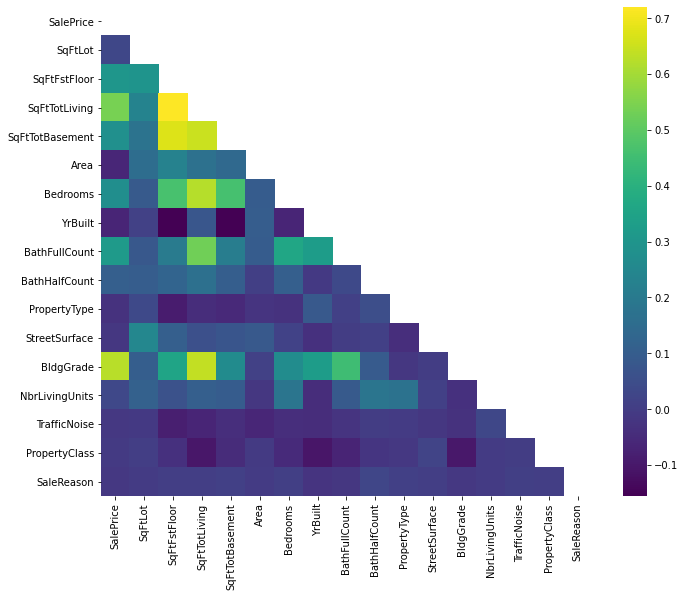

In [66]:
corr = residential_preprocessed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");

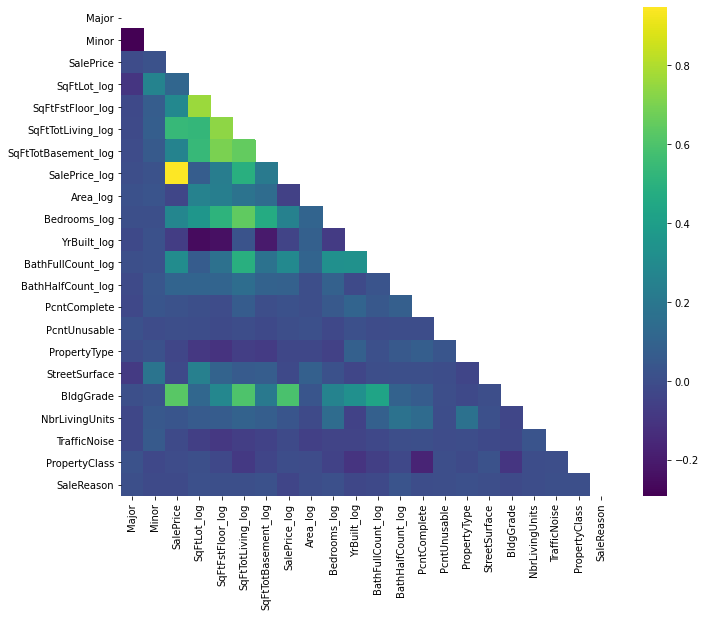

In [70]:
corr = residential_processed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");

I cleaned up SqFtTotLiving_log and SalePrice_log to take away outliers.

In [71]:
residential_processed = residential_processed[
    residential_processed['SqFtTotLiving_log'] < 2.9
]
residential_processed = residential_processed[
    residential_processed['SalePrice_log'] > -3
]

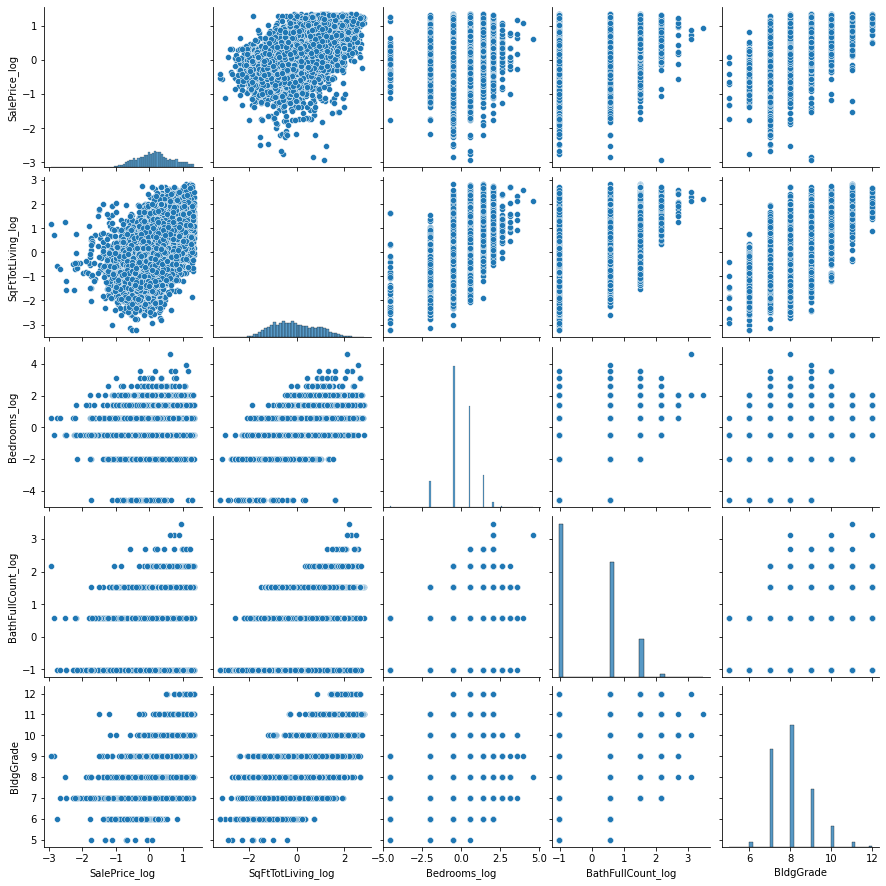

In [72]:
positively_correlated_cols = ['SalePrice_log', 'SqFtTotLiving_log', 'Bedrooms_log',
                              'BathFullCount_log', 'BldgGrade']
positively_correlated_df = residential_processed[positively_correlated_cols]
sns.pairplot(positively_correlated_df);

I cleaned up SqFtTotLiving and SalePrice to take out any outliers.

In [48]:
residential_preprocessed = residential_preprocessed[
    residential_preprocessed['SqFtTotLiving'] < 7500
]
residential_preprocessed = residential_preprocessed[
    residential_preprocessed['SalePrice'] > 500
]

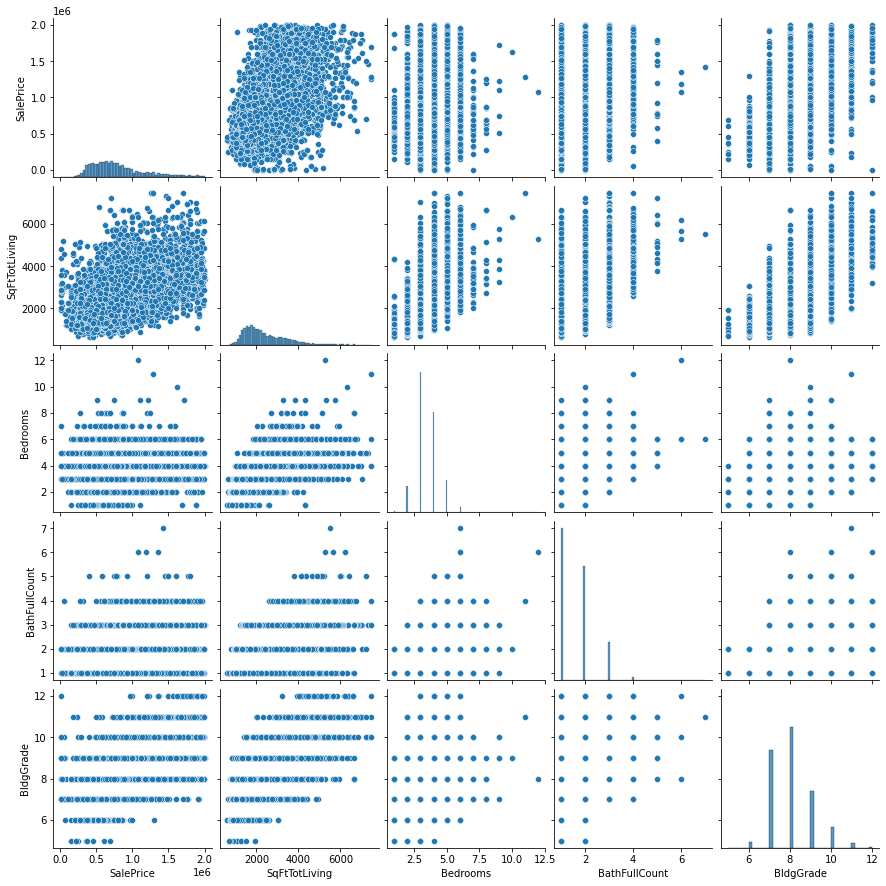

In [49]:
positively_correlated_cols = ['SalePrice', 'SqFtTotLiving', 'Bedrooms',
                              'BathFullCount', 'BldgGrade']
positively_correlated_df = residential_preprocessed[positively_correlated_cols]
sns.pairplot(positively_correlated_df);

Functions used to check stat assumptions.

In [80]:
def rainbow_check(results):
    rainbow_statistic, rainbow_p_value = linear_rainbow(results)
    print("Rainbow statistic:", rainbow_statistic)
    print("Rainbow p-value:", rainbow_p_value)

def Homoscadasticity_check(df, results, features):
    y = df["SalePrice"]
    y_hat = results.predict()
    fig4, ax4 = plt.subplots()
    ax4.set(xlabel="Predicted Sale Price",
        ylabel="Residuals (Predicted - Actual Sale Price)")
    ax4.scatter(x=y_hat, y=y_hat-y, color="blue", alpha=0.2)
    plt.show()

    lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat, df[features])
    print("Lagrange Multiplier p-value:", lm_p_value)
    print("F-statistic p-value:", f_p_value)

def vif_check(df, features):
    rows = df[features].values

    vif_df = pd.DataFrame()
    vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(len(features))]
    vif_df["feature"] = features
    print(vif_df)
def stat_checks(df, results, features):
    rainbow_check(results)
    Homoscadasticity_check(df, results, features)
    if len(features) > 1:
        vif_check(df, features)

I decided to use BldgGrade as my first feature to use as a predictor because it has the highest correlation to SalePrice.

In [51]:
fsm_df = residential_preprocessed[['BldgGrade', 'SalePrice']].copy()
fsm_df.dropna(inplace=True)
fsm = ols(formula="SalePrice ~ BldgGrade", data=fsm_df)
fsm_results = fsm.fit()

In [52]:
fsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     8407.
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:02:45   Log-Likelihood:            -1.8275e+05
No. Observations:               13038   AIC:                         3.655e+05
Df Residuals:                   13036   BIC:                         3.655e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.067e+06   2.06e+04    -51.791      0.000   -1.11e+06   -1.03e+06
BldgGrade   2.335e+05   2546.581     91.689      0.000    2.29e+05    2.38e+05
==============================================================================
Omnibus:                     1091.214   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1610.023
Skew:                           0.667   Prob(JB):                         0.00
Kurtosis:                       4.089   Cond. No.                         65.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Rainbow statistic: 1.0469183588404274
Rainbow p-value: 0.03210543199376004


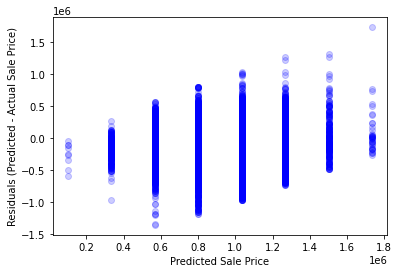

Lagrange Multiplier p-value: nan
F-statistic p-value: 0.0


In [57]:
stat_checks(fsm_df, fsm_results, ['BldgGrade'])

I can only explain about 39% of the variance in SalePrice, with only one feature it is statistically significant with an alpha level of 0.05.
We violate the normality assumption with the probability of our JB value being 0.
The rainbow stat check returned a p-value of 0.0321. Being below the mark of 0.05, this model violates the linearity assumption.
Returning a p-value for our residuals this low means that this model violates the homoscedasticity assumption.

Next I decided to add SqFtTotLiving as it had the second highest correlation.

In [60]:
model_2_df = residential_preprocessed[['BldgGrade', 'SqFtTotLiving','SalePrice']].copy()
model_2_df.dropna(inplace=True)
model_2 = ols(formula="SalePrice ~ BldgGrade + SqFtTotLiving", data=model_2_df)
model_2_results = model_2.fit()

In [61]:
model_2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     4836.
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:30:09   Log-Likelihood:            -1.8237e+05
No. Observations:               13038   AIC:                         3.648e+05
Df Residuals:                   13035   BIC:                         3.648e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.303e+05   2.18e+04    -38.162      0.000   -8.73e+05   -7.88e+05
BldgGrade      1.766e+05   3215.633     54.904      0.000     1.7e+05    1.83e+05
SqFtTotLiving    92.9626      3.352     27.733      0.000      86.392      99.533
==============================================================================
Omnibus:                      786.365   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1289.021
Skew:                           0.487   Prob(JB):                    1.24e-280
Kurtosis:                       4.194   Cond. No.                     2.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Rainbow statistic: 1.0282841583439586
Rainbow p-value: 0.13012674716314382


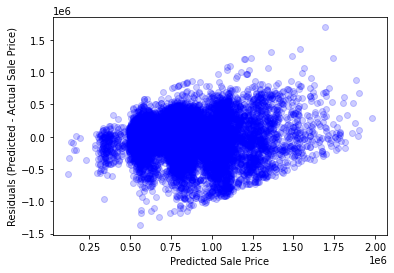

Lagrange Multiplier p-value: 0.0
F-statistic p-value: 0.0
        VIF        feature
0  9.862959      BldgGrade
1  9.862959  SqFtTotLiving


In [62]:
stat_checks(model_2_df, model_2_results, ['BldgGrade', 'SqFtTotLiving'])

I can explain 42.6% of the variance in SalePrice now with 2 features. It is statistically significant with an alpha level of 0.05. 
The probability of our JB value went up but it is still very low and there for this model still violates normality.
The p-value for the rainbow stat is .13 which is greater than .05 so this model does not violate the linearity assumption. 
Returning a p-value for the residuals this low means that this model still violates the homoscedasticity assumption. 
Also the VIF is quite high so we definitely have some multicolinerity already.

Because the VIF is so high I transformed the data next in order to get a better model.

In [73]:
model_3_df = residential_processed[['BldgGrade', 'SqFtTotLiving_log','SalePrice']].copy()
model_3_df.dropna(inplace=True)
model_3 = ols(formula="SalePrice ~ BldgGrade + SqFtTotLiving_log", data=model_3_df)
model_3_results = model_3.fit()

In [76]:
model_3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     5082.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:38:28   Log-Likelihood:            -1.8178e+05
No. Observations:               13009   AIC:                         3.636e+05
Df Residuals:                   13006   BIC:                         3.636e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6.077e+05   2.48e+04    -24.506      0.000   -6.56e+05   -5.59e+05
BldgGrade          1.774e+05   3057.879     58.002      0.000    1.71e+05    1.83e+05
SqFtTotLiving_log  1.002e+05   3213.744     31.182      0.000    9.39e+04    1.07e+05
==============================================================================
Omnibus:                      748.949   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1067.972
Skew:                           0.515   Prob(JB):                    1.24e-232
Kurtosis:                       3.954   Cond. No.                         82.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Rainbow statistic: 1.0216997518164876
Rainbow p-value: 0.19337020682115472


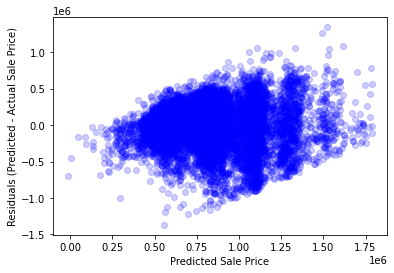

Lagrange Multiplier p-value: 0.0
F-statistic p-value: 0.0
   VIF            feature
0  1.0          BldgGrade
1  1.0  SqFtTotLiving_log


In [74]:
stat_checks(model_3_df, model_3_results, ['BldgGrade', 'SqFtTotLiving_log'])

Doing this transformation raised the R-squared, rainbow p-value and the probability of the JB value. It had no effect on the homoscedasticity. It brought the VIF down to 1 so we dont have to worry about multicolinearity.

Next I decided to add the feature with the next highest correlation which is BathFullCount_log

In [77]:
model_4_df = residential_processed[['BldgGrade', 'SqFtTotLiving_log', 'SalePrice', 'BathFullCount_log']].copy()
model_4_df.dropna(inplace=True)
model_4 = ols(formula="SalePrice ~ BldgGrade + SqFtTotLiving_log + BathFullCount_log", data=model_4_df)
model_4_results = model_4.fit()

In [78]:
model_4_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     3398.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:17:37   Log-Likelihood:            -1.8177e+05
No. Observations:               13009   AIC:                         3.636e+05
Df Residuals:                   13005   BIC:                         3.636e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6.296e+05   2.53e+04    -24.867      0.000   -6.79e+05    -5.8e+05
BldgGrade            1.8e+05   3120.200     57.697      0.000    1.74e+05    1.86e+05
SqFtTotLiving_log  1.048e+05   3387.459     30.926      0.000    9.81e+04    1.11e+05
BathFullCount_log -1.249e+04   2956.980     -4.224      0.000   -1.83e+04   -6695.363
==============================================================================
Omnibus:                      736.216   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1048.707
Skew:                           0.509   Prob(JB):                    1.89e-228
Kurtosis:                       3.948   Cond. No.                         83.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Rainbow statistic: 1.0206044910653957
Rainbow p-value: 0.20546236276367594


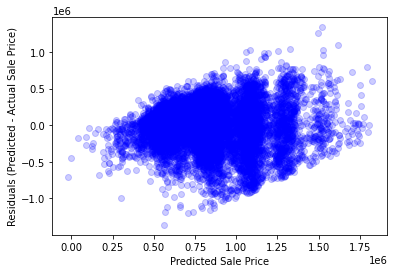

Lagrange Multiplier p-value: 0.0
F-statistic p-value: 0.0
        VIF            feature
0  1.000395          BldgGrade
1  1.320607  SqFtTotLiving_log
2  1.320986  BathFullCount_log


In [81]:
stat_checks(model_4_df, model_4_results, ['BldgGrade', 'SqFtTotLiving_log', 'BathFullCount_log'])

The R-squared and residuals didnt change but all the other stat checks improved while we dont have any multicolinearity.

I decided to check with one more feature, Bedrooms_log.

In [82]:
model_5_df = residential_processed[['BldgGrade', 'SqFtTotLiving_log', 'SalePrice', 
                                    'BathFullCount_log', 'Bedrooms_log']].copy()
model_5_df.dropna(inplace=True)
model_5 = ols(formula="""SalePrice ~ BldgGrade + SqFtTotLiving_log
                        + BathFullCount_log + Bedrooms_log""", data=model_5_df)
model_5_results = model_5.fit()

In [83]:
model_5_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     2552.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:31:12   Log-Likelihood:            -1.8177e+05
No. Observations:               13009   AIC:                         3.635e+05
Df Residuals:                   13004   BIC:                         3.636e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6.149e+05   2.59e+04    -23.763      0.000   -6.66e+05   -5.64e+05
BldgGrade          1.782e+05   3189.105     55.882      0.000    1.72e+05    1.84e+05
SqFtTotLiving_log  1.117e+05   4236.633     26.369      0.000    1.03e+05     1.2e+05
BathFullCount_log   -1.2e+04   2961.676     -4.052      0.000   -1.78e+04   -6196.209
Bedrooms_log      -9263.2594   3389.587     -2.733      0.006   -1.59e+04   -2619.173
==============================================================================
Omnibus:                      735.568   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1046.814
Skew:                           0.509   Prob(JB):                    4.87e-228
Kurtosis:                       3.946   Cond. No.                         85.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Rainbow statistic: 1.0213753402093542
Rainbow p-value: 0.19692044739552228


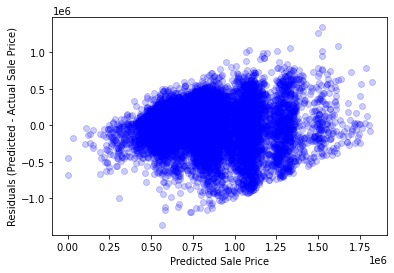

Lagrange Multiplier p-value: 0.0
F-statistic p-value: 0.0
        VIF            feature
0  1.000536          BldgGrade
1  2.019893  SqFtTotLiving_log
2  1.321374  BathFullCount_log
3  1.716025       Bedrooms_log


In [84]:
stat_checks(model_5_df, model_5_results, ['BldgGrade', 'SqFtTotLiving_log', 
                                          'BathFullCount_log', 'Bedrooms_log'])

The R-squared went up ever so slightly while the Rainbow p-value went down slightly. The model still violates the homoscedastisity assumption and normality assumption but continues to not have multicolinearity.